# Titanic Analytics
#### Data Mining Goals : Membuat model yang dapat memprediksi apakah penumpang akan selamat atau tidak

![titanic](https://miro.medium.com/max/600/0*CBDzZWhzCjBY2LhS.jpeg)

Dataset : [titanic data](https://www.kaggle.com/c/titanic)

Flow Project :

- Business Understanding
- Data Understanding
    - EDA
- Data Preparation
    - Feature Engineering
    - Feature Transformation
    - Feature Selection
    - Train Test Split
- Modeling
    - Base Line Model
    - Evaluation
        - Confusion Matrix
        - Classification Report
        - Accuracy
        - ROC AUC Curve
- Best Model and Feature Importance

In [1]:
# import basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
pwd

'C:\\Users\\USER\\Desktop\\python'

In [3]:
# import dataset
df = pd.read_csv('data_titanic.csv')

## Data Understanding

In [4]:
#quick look
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Do Some EDA

**Cleansing data/Cleaning Data**

In [7]:
df.duplicated().any()

False

In [8]:
def missing_data(df):
    miss1 = pd.DataFrame(df.isnull().sum()).reset_index()
    miss1.columns = ['columns', 'Num of Miss']
    miss2 = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['columns', 'Perc of Miss']
    miss = miss1.merge(miss2, how='inner', on='columns')
    return miss[miss['Num of Miss']!=0]

In [9]:
missing_data(df)

,columns,Num of Miss,Perc of Miss
5,Age,177,19.865320
10,Cabin,687,77.104377
11,Embarked,2,0.224467


In [10]:
#drop cabin
df.drop('Cabin', axis=1, inplace=True)

In [11]:
missing_data(df)

,columns,Num of Miss,Perc of Miss
5,Age,177,19.865320
10,Embarked,2,0.224467


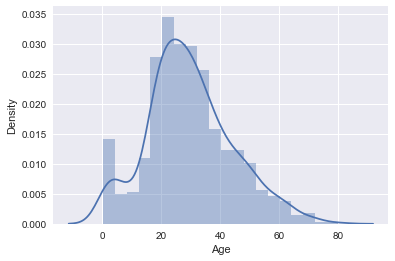

In [12]:
sns.distplot(df['Age'])

In [13]:
df['Age'] = df['Age'].fillna(np.ceil(df['Age'].mean())) 

In [14]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [15]:
missing_data(df)

,columns,Num of Miss,Perc of Miss


**Make Some Visualizations**

In [16]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


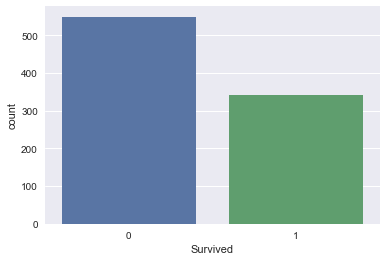

In [17]:
sns.countplot(df['Survived']) 
#target variable, data is unbalance hrsnya di garis yg sama jd perlu treatment

Numerical Features

No handles with labels found to put in legend.
No handles with labels found to put in legend.


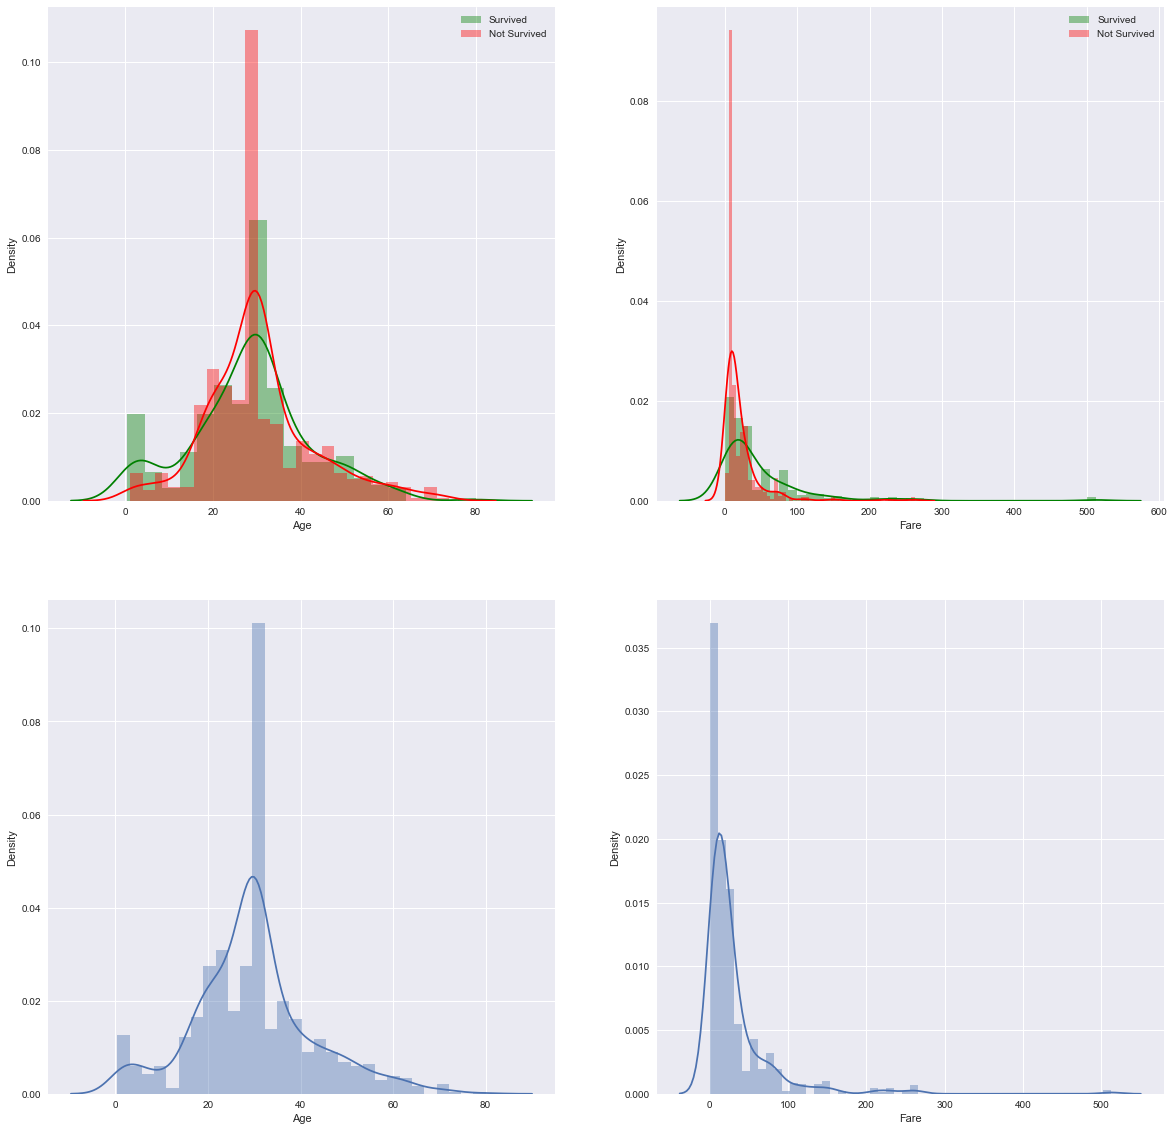

In [18]:
num_feat = ['Age', 'Fare']
survival = df['Survived']==1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
 
for i, feature in enumerate(num_feat):
    sns.distplot(df[survival][feature], label = 'Survived', ax= axs[0][i], color='green')
    sns.distplot(df[~survival][feature], label = 'Not Survived', ax= axs[0][i], color='red')
    sns.distplot(df[feature], ax=axs[1][i])
    
    axs[0][i].legend()
    axs[1][i].legend()
plt.show()

Categorical Features

In [19]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


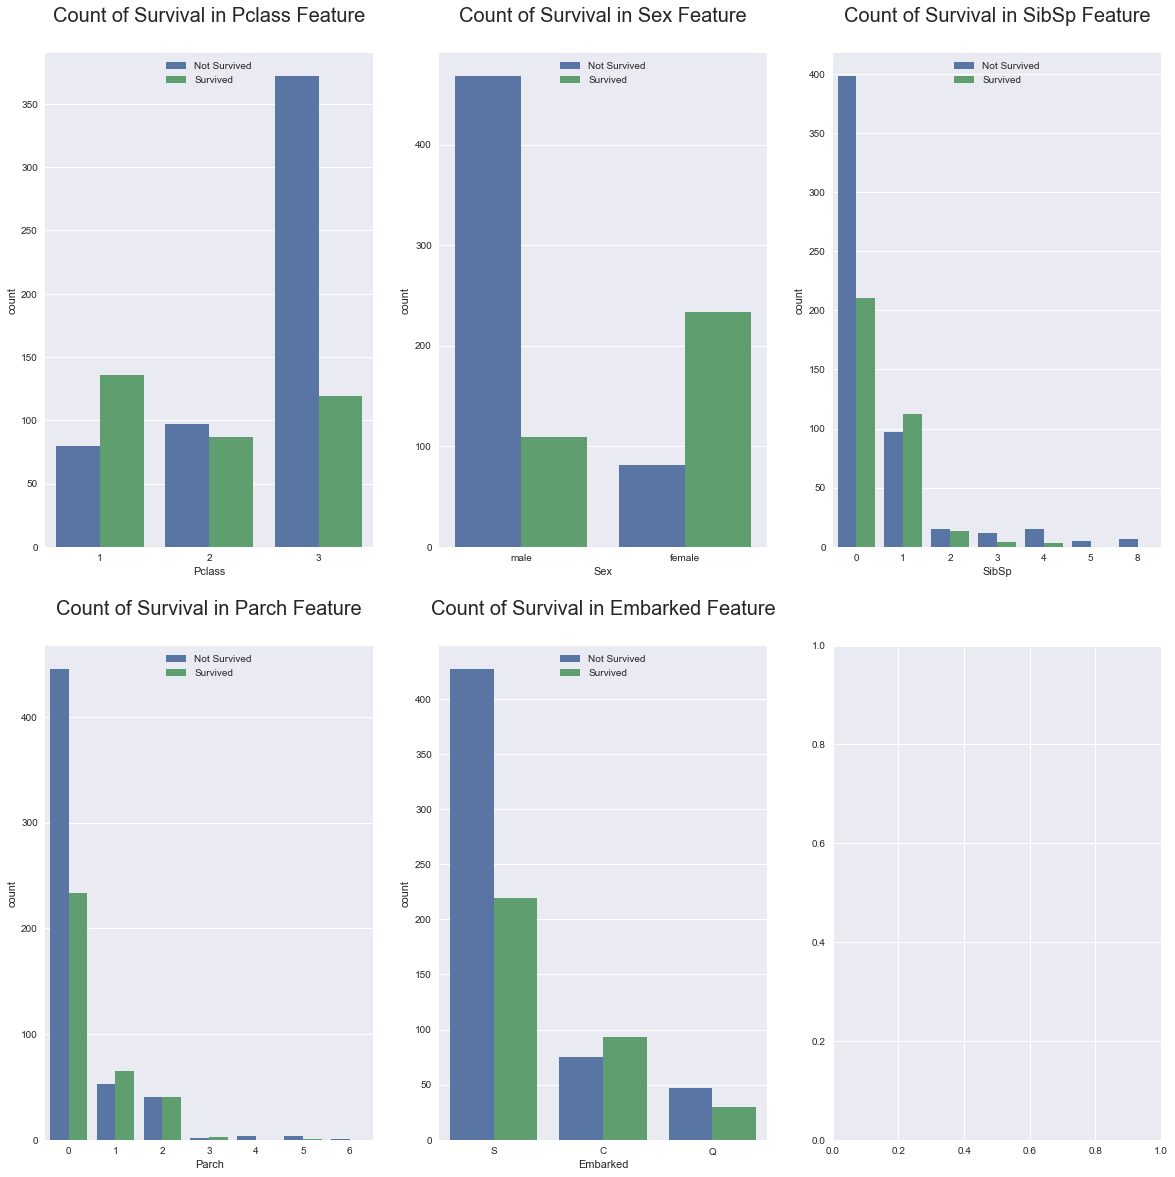

In [20]:
cat_feature = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

fig, axs = plt.subplots(2, 3, figsize=(20,20))

for i, feature in enumerate(cat_feature,1): #set counternya dari 1 (yg biasanya counter python mulai dari 0)
    plt.subplot(2, 3, i)
    sns.countplot(df[feature], hue = df['Survived'])
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 10}) #letakkan legend pada tengah-tengah
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)
    #count of survival pada {} refer kepada list temporary variable feature yang dimana refer juga ke cat_feature

## Data Preparation

#### Feature Engineering

Binning Continuous Features

In [21]:
df['Fare_bin'] = pd.qcut(df['Fare'], 13)

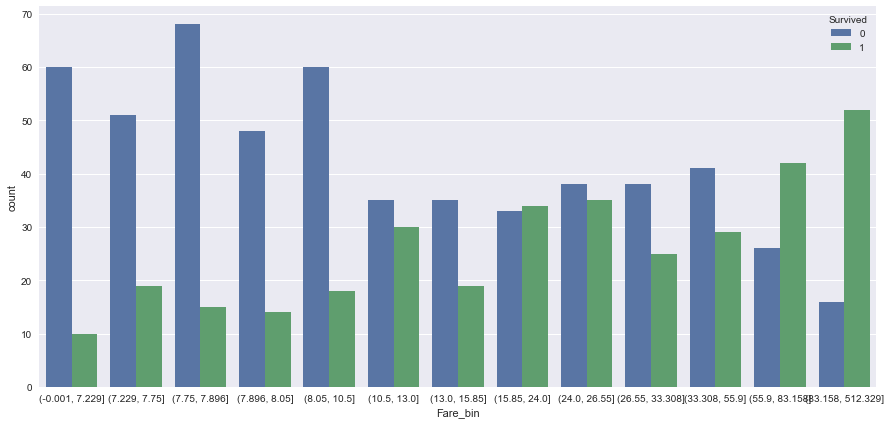

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(df['Fare_bin'], hue=df['Survived'])

In [23]:
df['Age_bin'] = pd.qcut(df['Age'], 10, duplicates='drop')

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_bin,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(7.229, 7.75]","(20.0, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(55.9, 83.158]","(32.5, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(7.896, 8.05]","(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(33.308, 55.9]","(32.5, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(7.896, 8.05]","(32.5, 38.0]"


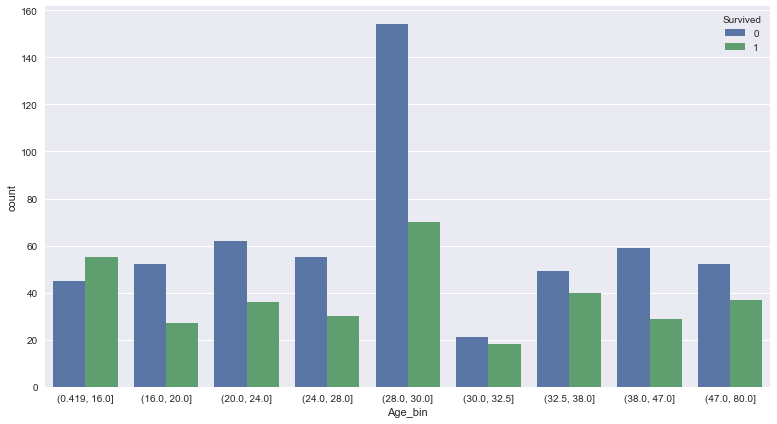

In [25]:
plt.figure(figsize=(13, 7))
sns.countplot(df['Age_bin'], hue=df['Survived'])

Family Size

In [26]:
df['Family Size'] = df['SibSp'] + df['Parch'] + 1

Notes :
- Family Size with 1 are labeled as Alone
- Family Size with 2, 3 and 4 are labeled as Small
- Family Size with 5 and 6 are labeled as Medium
- Family Size with 7, 8 and 11 are labeled as Large

In [27]:
def segment_fml(x):
    segment = ''
    
    if x['Family Size'] <= 1:
        segment = 'Alone'
    elif x['Family Size'] > 1 and x['Family Size'] <=4:
        segment = 'Small'
    elif x['Family Size'] > 4 and x['Family Size'] <= 6:
        segment = 'Medium'
    else:
        segment = 'Large'
    return segment

df['Segment Family'] = df.apply(lambda x : segment_fml(x), axis=1)

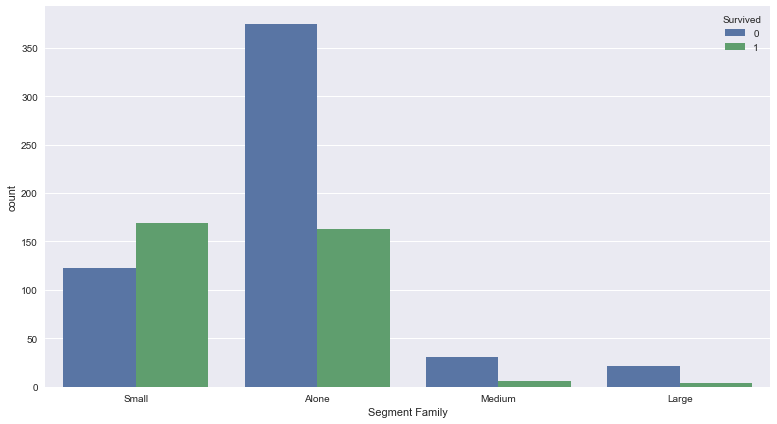

In [28]:
plt.figure(figsize=(13, 7))
sns.countplot(df['Segment Family'], hue=df['Survived'])

Title & Is Married

In [29]:
df.head()['Name']

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [30]:
df.tail()['Name']

886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [31]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

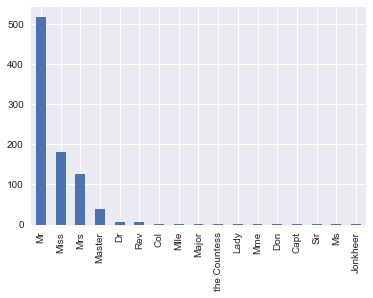

In [32]:
df['Title'].value_counts().plot.bar()

In [33]:
df['Title'] = df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'],
                                          'Miss/Mrs/Ms')
df['Title'] = df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'],
                                          'Dr/Military/Noble/Clergy')

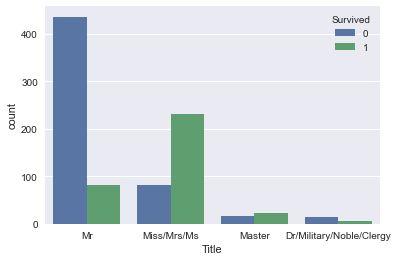

In [34]:
sns.countplot(df['Title'], hue=df['Survived'])

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_bin,Age_bin,Family Size,Segment Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(7.229, 7.75]","(20.0, 24.0]",2,Small,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(55.9, 83.158]","(32.5, 38.0]",2,Small,Miss/Mrs/Ms
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(7.896, 8.05]","(24.0, 28.0]",1,Alone,Miss/Mrs/Ms
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(33.308, 55.9]","(32.5, 38.0]",2,Small,Miss/Mrs/Ms
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(7.896, 8.05]","(32.5, 38.0]",1,Alone,Mr


### Feature Transformation

##### Encode

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
lE = LabelEncoder()

In [38]:
df['Sex'] = lE.fit_transform(df['Sex'])

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_bin,Age_bin,Family Size,Segment Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,"(7.229, 7.75]","(20.0, 24.0]",2,Small,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,"(55.9, 83.158]","(32.5, 38.0]",2,Small,Miss/Mrs/Ms
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,"(7.896, 8.05]","(24.0, 28.0]",1,Alone,Miss/Mrs/Ms
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,"(33.308, 55.9]","(32.5, 38.0]",2,Small,Miss/Mrs/Ms
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,"(7.896, 8.05]","(32.5, 38.0]",1,Alone,Mr


In [40]:
df_all = pd.get_dummies(df, columns=['Embarked', 'Segment Family', 'Title'], prefix=['emb','fml', 'tlt'])

In [41]:
pd.set_option('display.max_columns', 30)

In [42]:
df_all.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Fare_bin,Age_bin,Family Size,emb_C,emb_Q,emb_S,fml_Alone,fml_Large,fml_Medium,fml_Small,tlt_Dr/Military/Noble/Clergy,tlt_Master,tlt_Miss/Mrs/Ms,tlt_Mr
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,"(7.229, 7.75]","(20.0, 24.0]",2,0,0,1,0,0,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,"(55.9, 83.158]","(32.5, 38.0]",2,1,0,0,0,0,0,1,0,0,1,0


##### Feature Selection

In [43]:
df_all = df_all.drop(columns=['PassengerId', 'Name', 'Fare_bin', 'Ticket', 'Age_bin', ])

In [44]:
df_all.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family Size,emb_C,emb_Q,emb_S,fml_Alone,fml_Large,fml_Medium,fml_Small,tlt_Dr/Military/Noble/Clergy,tlt_Master,tlt_Miss/Mrs/Ms,tlt_Mr
0,0,3,1,22.0,1,0,7.2500,2,0,0,1,0,0,0,1,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,2,1,0,0,0,0,0,1,0,0,1,0


#### Check for Correlation

In [45]:
label = df_all['Survived']
df_corr = df_all.drop(columns=['Survived'])
df_corr['Label'] = label

Text(0.5, 1.0, 'Heatmap Correlation for Survived')

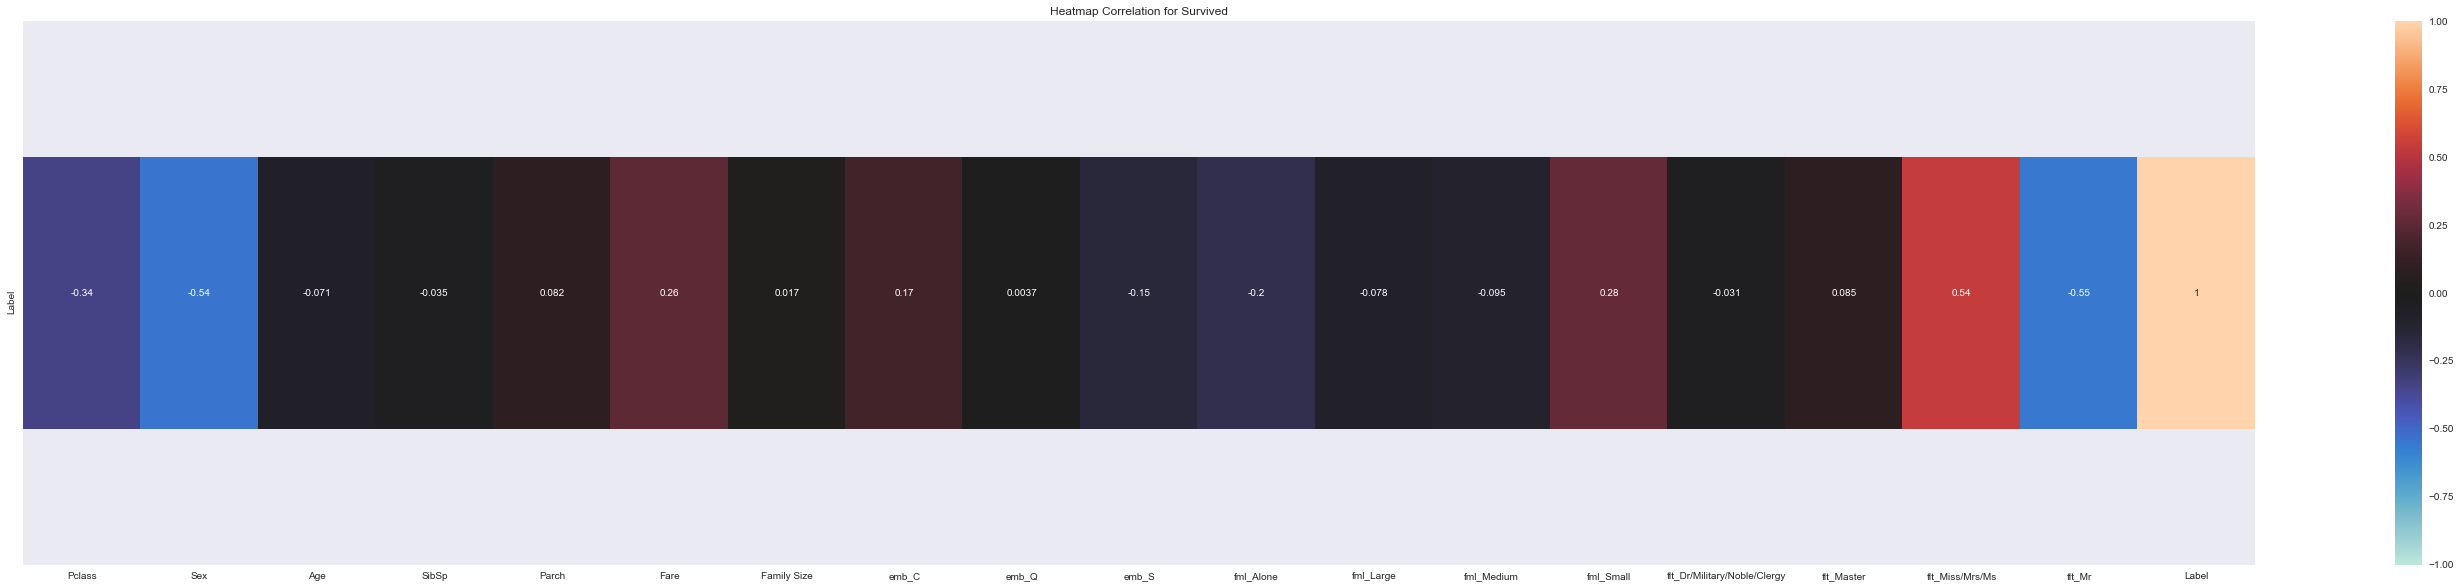

In [46]:
corr = df_corr.corr()
corr2 = corr.iloc[-1:,:]

plt.figure(figsize=(50, 10))
ax = sns.heatmap(corr2, annot=True, vmin=-1, vmax=1, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap Correlation for Survived')

In [47]:
x = df_all.drop('Survived', axis=1)
y = df_all['Survived']

### Baseline Model

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [50]:
# import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [51]:
#models
rf = RandomForestClassifier()
svm = SVC()
lr = LogisticRegression()

In [52]:
#modeling
models = [rf, svm, lr]

for model in models:
    model.fit(x_train, y_train)

In [53]:
#evaluation
ypred_rf = rf.predict(x_test)
ypred_svm = svm.predict(x_test)
ypred_lr = lr.predict(x_test)

In [54]:
!pip install plot_metric

**Random Forest**

In [55]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Text(34.0, 0.5, 'Actual Label')

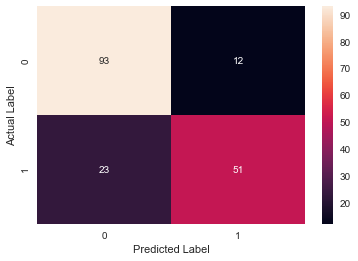

In [56]:
#use seaborn, bisa diubah2 
print(classification_report(y_test, ypred_rf))
sns.heatmap(confusion_matrix(y_test, ypred_rf), annot = True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
#support = sum of row

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



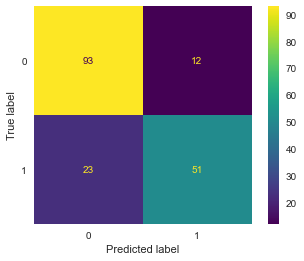

In [57]:
#use sklearn, gabisa diubah2
plot_confusion_matrix(rf, x_test, y_test)
print(classification_report(y_test, ypred_rf))
plt.grid(False)

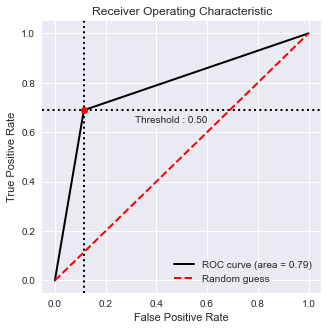

In [58]:
#roc curve
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_rf, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

**SVM**

              precision    recall  f1-score   support

           0       0.65      0.92      0.76       105
           1       0.73      0.30      0.42        74

    accuracy                           0.66       179
   macro avg       0.69      0.61      0.59       179
weighted avg       0.69      0.66      0.62       179



Text(34.0, 0.5, 'Actual Label')

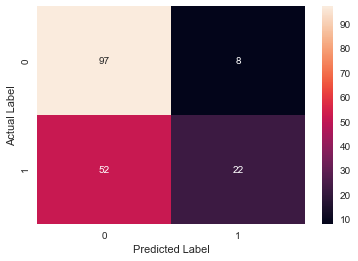

In [59]:
print(classification_report(y_test, ypred_svm))
sns.heatmap(confusion_matrix(y_test, ypred_svm), annot = True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

              precision    recall  f1-score   support

           0       0.65      0.92      0.76       105
           1       0.73      0.30      0.42        74

    accuracy                           0.66       179
   macro avg       0.69      0.61      0.59       179
weighted avg       0.69      0.66      0.62       179



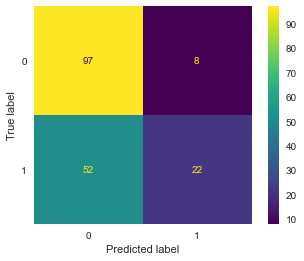

In [60]:
plot_confusion_matrix(svm, x_test, y_test)
print(classification_report(y_test, ypred_svm))
plt.grid(False)

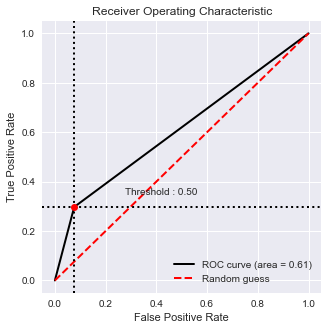

In [61]:
bc = BinaryClassification(y_test, ypred_svm, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

**Logistic Regression**

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       105
           1       0.87      0.78      0.82        74

    accuracy                           0.86       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



Text(34.0, 0.5, 'Actual Label')

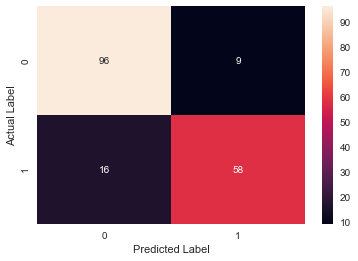

In [62]:
print(classification_report(y_test, ypred_lr))
sns.heatmap(confusion_matrix(y_test, ypred_lr), annot = True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       105
           1       0.87      0.78      0.82        74

    accuracy                           0.86       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



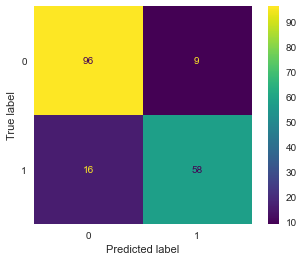

In [63]:
plot_confusion_matrix(lr, x_test, y_test)
print(classification_report(y_test, ypred_lr))
plt.grid(False)

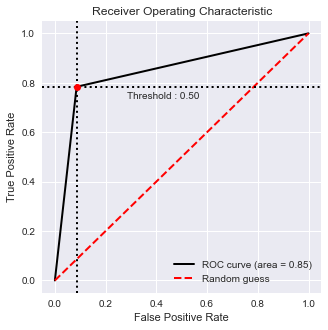

In [64]:
bc = BinaryClassification(y_test, ypred_lr, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

#### GridSearchCV

In [65]:
#import gridsearch
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #trial randomized search

In [66]:
%%time
clf = GridSearchCV(RandomForestClassifier(), {
    'n_estimators': [1,3,5],
    'criterion': ['gini','entropy']
}, cv=5, return_train_score=False)

clf.fit(x, y)

clf.cv_results_

Wall time: 440 ms


{'mean_fit_time': array([0.00718117, 0.0105773 , 0.01516585, 0.00638719, 0.01016603,
        0.01435919]),
 'std_fit_time': array([0.00074686, 0.00080395, 0.00040749, 0.0013519 , 0.00040155,
        0.00049063]),
 'mean_score_time': array([0.00259099, 0.00279202, 0.00338802, 0.00238867, 0.00260324,
        0.00238996]),
 'std_score_time': array([0.00079744, 0.00040123, 0.00048426, 0.00049237, 0.00048817,
        0.00049099]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[1, 3, 5, 1, 3, 5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini', 'n_estimators': 1},
  {'criterion': 'gini', 'n_estimators': 3},
  {'criterion': 'gini', 'n_estimators': 5},
  {'criterion': 'ent

In [67]:
rf_grid = pd.DataFrame(clf.cv_results_)
rf_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007181,0.000747,0.002591,0.000797,gini,1,"{'criterion': 'gini', 'n_estimators': 1}",0.748603,0.780899,0.808989,0.730337,0.730337,0.759833,0.030745,5
1,0.010577,0.000804,0.002792,0.000401,gini,3,"{'criterion': 'gini', 'n_estimators': 3}",0.743017,0.769663,0.814607,0.780899,0.797753,0.781188,0.024418,4
2,0.015166,0.000407,0.003388,0.000484,gini,5,"{'criterion': 'gini', 'n_estimators': 5}",0.770950,0.764045,0.842697,0.775281,0.803371,0.791269,0.028986,1
3,0.006387,0.001352,0.002389,0.000492,entropy,1,"{'criterion': 'entropy', 'n_estimators': 1}",0.731844,0.724719,0.775281,0.758427,0.769663,0.751987,0.020228,6
4,0.010166,0.000402,0.002603,0.000488,entropy,3,"{'criterion': 'entropy', 'n_estimators': 3}",0.793296,0.741573,0.825843,0.780899,0.797753,0.787873,0.027426,2
5,0.014359,0.000491,0.002390,0.000491,entropy,5,"{'criterion': 'entropy', 'n_estimators': 5}",0.776536,0.764045,0.808989,0.764045,0.814607,0.785644,0.021908,3


In [68]:
rf_grid[['param_n_estimators','param_criterion','mean_test_score']]

,param_n_estimators,param_criterion,mean_test_score
0,1,gini,0.759833
1,3,gini,0.781188
2,5,gini,0.791269
3,1,entropy,0.751987
4,3,entropy,0.787873
5,5,entropy,0.785644


In [69]:
clf.best_params_

{'criterion': 'gini', 'n_estimators': 5}

In [70]:
clf.best_score_

0.7912685958194714

### Try Some models and hyperparameter

In [71]:
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C' : [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'kernel': ['rbf'],
            'gamma' : ['scale', 'auto']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [i for i in range(1,100,5)],
            'criterion' : ['gini', 'entropy'],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'n_jobs' : [-1]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class' : ['auto', 'ovr', 'multinomial'],
            'n_jobs' : [-1]
        }
    }
}

In [72]:
%%time
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Wall time: 2min 43s


,model,best_score,best_params
0,svm,0.747524,"{'C': 6.0, 'gamma': 'auto', 'kernel': 'rbf'}"
1,random_forest,0.813690,"{'criterion': 'entropy', 'max_features': 'auto..."
2,logistic_regression,0.826025,"{'C': 1.0, 'multi_class': 'auto', 'n_jobs': -1..."


In [73]:
%%time
scores = []

for model_name, mp in model_params.items():
    clf_random =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf_random.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf_random.best_score_,
        'best_params': clf_random.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Wall time: 11.8 s


,model,best_score,best_params
0,svm,0.747524,"{'kernel': 'rbf', 'gamma': 'auto', 'C': 6.0}"
1,random_forest,0.812586,"{'n_jobs': -1, 'n_estimators': 21, 'max_featur..."
2,logistic_regression,0.826025,"{'solver': 'liblinear', 'penalty': 'l2', 'n_jo..."


In [74]:
df['best_params'][2]

{'solver': 'liblinear',
 'penalty': 'l2',
 'n_jobs': -1,
 'multi_class': 'ovr',
 'C': 1.0}

### Modeling

In [75]:
model = LogisticRegression(C=1.0, multi_class='auto', penalty='l2', solver='liblinear', n_jobs=-1)

In [76]:
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Feature Importance LogReg

In [77]:
importance = model.coef_[0]

In [78]:
importance

array([-0.88878876, -0.61296557, -0.01632816, -0.5274395 , -0.31244361,
        0.00438369,  0.2427842 ,  0.4775509 ,  0.41670337,  0.18841304,
        0.96920801, -0.01973672, -0.97915315,  1.11234916, -0.89201766,
        1.93753657,  1.23083316, -1.19368476])

In [79]:
kolom = list(df_all.columns)
del kolom[0]

In [80]:
df_imp = pd.DataFrame({'columns' : kolom,
                      'Importance' : importance})

In [81]:
df_imp
#mirip corr

,columns,Importance
0,Pclass,-0.888789
1,Sex,-0.612966
2,Age,-0.016328
3,SibSp,-0.527439
4,Parch,-0.312444
5,Fare,0.004384
6,Family Size,0.242784
7,emb_C,0.477551
8,emb_Q,0.416703
9,emb_S,0.188413


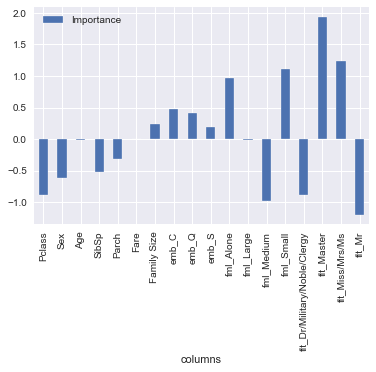

In [82]:
df_imp.set_index('columns').plot.bar()

In [83]:
def mutlak(x):
    if x['Importance'] <0:
        return x['Importance']*-1
    else:
        return x['Importance']
df_imp['Value'] = df_imp.apply(lambda x: mutlak(x), axis=1)

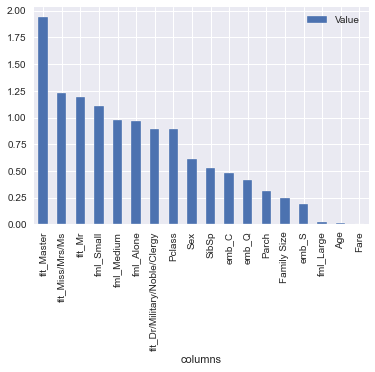

In [84]:
df_imp.sort_values(by='Value', ascending=False)[['columns', 'Value']].set_index('columns').plot.bar()

# Finished